## 认识价差以及经典指标的测试（2021.12.19）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.append('C:/Users/Administrator/Desktop/Repositories/Low-Frequency-Spread-Estimator')
sys.path.append('C:/Users/Handsome Bad Guy/Desktop/Repositories/Low-Frequency-Spread-Estimator')

from SpreadEstimator.SpreadEstimator import SpreadEstimator
from mytools.AutoTester import AutoTester

from time import time

In [2]:
import SpreadEstimator
importlib.reload(SpreadEstimator.SpreadEstimator)
from SpreadEstimator.SpreadEstimator import SpreadEstimator

In [3]:
se = SpreadEstimator()

#### 若在笔记本上使用，则运行以下block

In [4]:
se = SpreadEstimator(data_path='C:/Users/Handsome Bad Guy/Desktop/DailyData/data')

FileNotFoundError: [WinError 3] 系统找不到指定的路径。: 'C:/Users/Handsome Bad Guy/Desktop/DailyData/data'

### 简易测试几个随意构造的价差估计器的截面平均corr

In [4]:
stats, signal = se.test_factor('div{high,low}', corr_type='log', method='cs')
stats, signal = se.test_factor('div{high,low}', corr_type='log', method='ts')

stats, signal = se.test_factor('div{high,low}', corr_type='log', method='cs', spread_type='relative_spread')
stats, signal = se.test_factor('div{high,low}', corr_type='linear', method='ts', spread_type='relative_spread')

mean corr: 0.1773, positive_corr_ratio: 0.9918, corr_IR: 2.7977
mean corr: 0.3971, positive_corr_ratio: 0.9856, corr_IR: 2.2469
mean corr: -0.1054, positive_corr_ratio: 0.0782, corr_IR: -1.4613
mean corr: 0.0099, positive_corr_ratio: 0.5406, corr_IR: 0.0437


### 测试论文中的估计器

#### HL, 2012

In [10]:
# HL estimator
print(np.sqrt(2)-1)
print(3-np.sqrt(2)*2)

0.41421356237309515
0.1715728752538097


In [15]:
fml = 'minus{div{powv{tsmean{powv{minus{div{high,low},1},2},10},0.5},0.4142},'+\
'powv{div{tsmean{powv{minus{div{tsmax{high,2},tsmin{low,2}},1},2},10},0.1716},0.5}}'

In [16]:

print('cs_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='cs')
stats, signal = se.test_factor(fml, corr_type='log',method='cs')

print('')
print('cs_relative_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='cs', spread_type='relative_spread')
stats, signal = se.test_factor(fml, corr_type='log',method='cs', spread_type='relative_spread')

print('')
print('ts_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='ts')
stats, signal = se.test_factor(fml, corr_type='log',method='ts')

print('')
print('ts_relative_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='ts', spread_type='relative_spread')
stats, signal = se.test_factor(fml, corr_type='log',method='ts', spread_type='relative_spread')

cs_spread
mean corr: -0.0753, positive_corr_ratio: 0.0940, corr_IR: -1.3808
mean corr: -0.1242, positive_corr_ratio: 0.0556, corr_IR: -1.7685

cs_relative_spread
mean corr: 0.1964, positive_corr_ratio: 0.9915, corr_IR: 3.2291
mean corr: 0.2034, positive_corr_ratio: 0.9957, corr_IR: 3.2123

ts_spread
mean corr: -0.0569, positive_corr_ratio: 0.2633, corr_IR: -0.5274
mean corr: -0.0644, positive_corr_ratio: 0.2508, corr_IR: -0.5663

ts_relative_spread
mean corr: -0.0019, positive_corr_ratio: 0.4440, corr_IR: -0.0159
mean corr: -0.0023, positive_corr_ratio: 0.4608, corr_IR: -0.0189


#### Roll, 1999

In [14]:
fml = 'neg{tscov{tsdelta{close,1},tsdelay{tsdelta{close,1},1},5}}'

print('cs_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='cs')
stats, signal = se.test_factor(fml, corr_type='log',method='cs')

print('')
print('cs_relative_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='cs', spread_type='relative_spread')
stats, signal = se.test_factor(fml, corr_type='log',method='cs', spread_type='relative_spread')

print('')
print('ts_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='ts')
stats, signal = se.test_factor(fml, corr_type='log',method='ts')

print('')
print('ts_relative_spread')
stats, signal = se.test_factor(fml, corr_type='linear',method='ts', spread_type='relative_spread')
stats, signal = se.test_factor(fml, corr_type='log',method='ts', spread_type='relative_spread')

cs_spread
mean corr: 0.2892, positive_corr_ratio: 0.8828, corr_IR: 1.2613
mean corr: 0.1996, positive_corr_ratio: 0.9121, corr_IR: 1.5981

cs_relative_spread
mean corr: -0.0462, positive_corr_ratio: 0.0418, corr_IR: -1.6650
mean corr: -0.0690, positive_corr_ratio: 0.0335, corr_IR: -1.6001

ts_spread
mean corr: 0.0952, positive_corr_ratio: 0.7410, corr_IR: 0.6625
mean corr: 0.0998, positive_corr_ratio: 0.7544, corr_IR: 0.7060

ts_relative_spread
mean corr: -0.0745, positive_corr_ratio: 0.2917, corr_IR: -0.5325
mean corr: -0.0813, positive_corr_ratio: 0.2946, corr_IR: -0.5650


In [11]:
AT = AutoTester()
signal[signal<0] = 0
signal = np.sqrt(signal)
signal[signal <= 0.01] = 0.01

In [13]:
stats = AT.test(signal, se.data.spread, corr_type='linear',method='cs')
print('mean corr: {:.4f}, positive_corr_ratio: {:.4f}, corr_IR: {:.4f}'.
              format(stats.mean_corr, stats.positive_corr_ratio, stats.corr_IR))

stats = AT.test(-signal, se.data.spread_dic['relative_spread'], corr_type='linear',method='cs')
print('mean corr: {:.4f}, positive_corr_ratio: {:.4f}, corr_IR: {:.4f}'.
              format(stats.mean_corr, stats.positive_corr_ratio, stats.corr_IR))

mean corr: 0.5197, positive_corr_ratio: 0.9917, corr_IR: 3.9607
mean corr: 0.2200, positive_corr_ratio: 0.9917, corr_IR: 3.7360


#### Gibbs, 2004

In [30]:
# import estimator
importlib.reload(estimator.Gibbs2004)
from estimator.Gibbs2004 import gibbs

In [36]:
t  = time()
c_s, q_s, sigma_u_s = gibbs(se.data.data_dic['close'][-20:,0], 
                            sigma_c=1e6, ig_alpha=2, 
                            ig_beta=1e-4, sample_num=1000)
print('done. time used: {:4f}s'.format(time()-t))

done. time used: 1.610404s


In [37]:
np.mean(c_s)

0.0007866092598205954

In [43]:
np.mean(sigma_u_s[-500:])

0.003225734891713073

(array([930.,  46.,  13.,   3.,   5.,   0.,   0.,   0.,   1.,   2.]),
 array([0.00027506, 0.00740077, 0.01452648, 0.0216522 , 0.02877791,
        0.03590362, 0.04302933, 0.05015504, 0.05728075, 0.06440646,
        0.07153218]),
 <BarContainer object of 10 artists>)

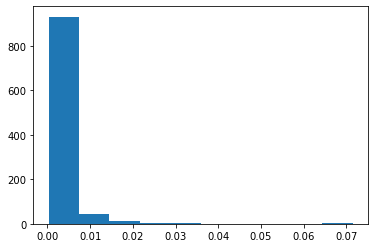

In [44]:
plt.hist(sigma_u_s)

In [42]:
np.var(np.log(se.data.data_dic['close'][-20:,0])-np.log(se.data.data_dic['close'][-21:-1,0]))

0.0003004649419862676